In [3]:
import numpy as np
from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy.table import Column
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
catalog_path='/Users/EvanB.LAPTOP-8CHCIOMA/Downloads/'

cosmos = Table.read(catalog_path+'a100-nsa-for-adap.fits')

print(cosmos)

#cosmos.filled(np.nan)

AGC   Name          OrigSrcName         ... DET_BIT  MOON_LEV W1NM
--- -------- -------------------------- ... ------- --------- ----
  1 I5378a.. HI000235.9+163854_0004+17b ...       0        --    0
  6 478-015. HI000310.0+215735_0004+23b ...      15      1122   14
  8 N7814... HI000314.0+160907_0004+15a ...      15      1111   14
 11 M+401014 HI000320.4+220602_0004+23b ...       7      3355   13
 12 499-041. HI000319.4+294807_0004+29b ...      15      0144   18
 14 478-019. HI000333.9+231147_0004+23b ...       0        --    0
 16 N7816... HI000349.7+072907_0004+07b ...      15      1111   14
 17 ........ HI000342.3+151321_0004+15a ...       7      1100   13
 19 N7817... HI000358.4+204458_0004+21a ...      15      2244   15
 21 N7818... HI000408.1+072242_0004+07b ...      15      1111   14
...      ...                        ... ...     ...       ...  ...
  0       --                         -- ...       0              0
  0       --                         -- ...       0           

In [28]:
cosmos.colnames

['AGC',
 'Name',
 'OrigSrcName',
 'HISrcName',
 'RAdeg_HI',
 'DECdeg_HI',
 'RAdeg_OC',
 'DECdeg_OC',
 'RAdeg_Use',
 'DECdeg_Use',
 'Vhelio',
 'sigV',
 'W50',
 'sigWtot',
 'sigWstat',
 'W20',
 'HIflux',
 'sigflux',
 'SNR',
 'RMS',
 'Dist',
 'sigdist',
 'logMH',
 'siglogMH',
 'HIcode',
 'objID_1',
 'parentID',
 'specObjID',
 'ra_1',
 'dec_1',
 'modelMag_u',
 'modelMag_g',
 'modelMag_r',
 'modelMag_i',
 'modelMag_z',
 'modelMagErr_u',
 'modelMagErr_g',
 'modelMagErr_r',
 'modelMagErr_i',
 'modelMagErr_z',
 'cModelMag_u',
 'cModelMag_g',
 'cModelMag_r',
 'cModelMag_i',
 'cModelMag_z',
 'cModelMagErr_u',
 'cModelMagErr_g',
 'cModelMagErr_r',
 'cModelMagErr_i',
 'cModelMagErr_z',
 'petroMag_u',
 'petroMag_g',
 'petroMag_r',
 'petroMag_i',
 'petroMag_z',
 'petroMagErr_u',
 'petroMagErr_g',
 'petroMagErr_r',
 'petroMagErr_i',
 'petroMagErr_z',
 'petroRad_u',
 'petroRad_g',
 'petroRad_r',
 'petroRad_i',
 'petroRad_z',
 'petroR50_g',
 'petroR50_r',
 'petroR50_i',
 'petroR90_g',
 'petroR90_r',
 '

In [23]:
print(cosmos['RAdeg_Use'])

RAdeg_Use
---------
  0.65667
  0.79042
  0.81167
  0.83958
    0.835
  0.89625
  0.95375
     0.93
  0.99583
  1.03708
      ...
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
Length = 39098 rows


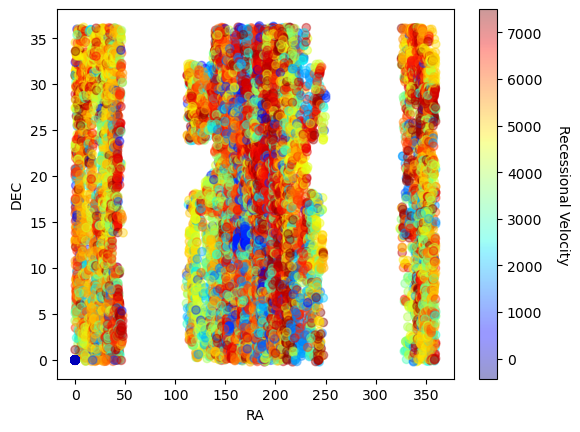

In [16]:
#selection= (cosmos['Vhelio']) & (cosmos['RAdeg_Use']) & (cosmos['DECdeg_Use'])

ra = cosmos['RAdeg_Use']
dec = cosmos['DECdeg_Use']
ccode = cosmos['Vhelio']

plt.scatter(ra,dec,c=ccode,cmap='jet',alpha=0.4)
plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(100,270)
cbar = plt.colorbar() # Adds a colorbar
cbar.set_label('Recessional Velocity',rotation=270,labelpad=20)

In [28]:
cosmos_selection = (cosmos['Z']>0.002) & (cosmos['Z']<0.025) & (cosmos['PETROTH90']>6.5) & (cosmos['SNR']>20)
print(len(cosmos_selection))

39098


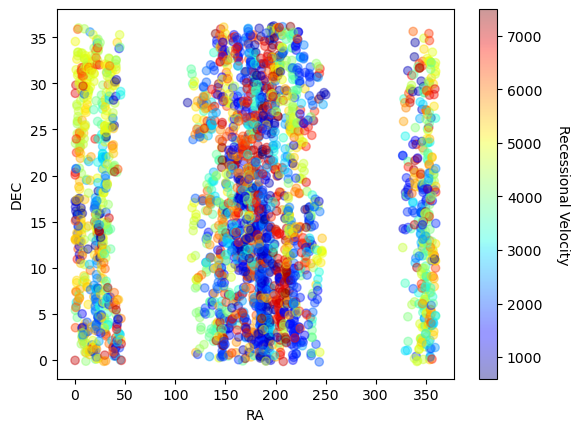

In [29]:
ra_cosmos = cosmos['RAdeg_Use'][cosmos_selection]
dec_cosmos = cosmos['DECdeg_Use'][cosmos_selection]
ccode = cosmos['Vhelio'][cosmos_selection]

plt.scatter(ra_cosmos,dec_cosmos,c=ccode,cmap='jet',alpha=0.4)
plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(110,250)
cbar = plt.colorbar() # Adds a colorbar
cbar.set_label('Recessional Velocity',rotation=270,labelpad=20)

In [30]:
print(len(ra_cosmos))

2730
